In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc

Weighted_accuracy = tool_accuracy * volume_factor
Volume_factor = tool_requests / all_tools_requests


In [10]:
# read accuracy csv file
tools_accuracy_info = pd.read_csv("../data/tools_accuracy.csv")
tools_accuracy_info.head()

tool  tool_accuracy  total_requests  \
0  claude-prediction-offline      64.444444              90   
1   claude-prediction-online      73.563218             261   
2         prediction-offline      76.223582            3596   
3     prediction-offline-sme      79.220779              77   
4          prediction-online      73.796204           10010   

                   min                  max  
0  2024-05-17 23:23:05  2024-06-22 04:20:40  
1  2024-05-17 10:43:45  2024-07-10 01:29:35  
2  2024-05-17 10:32:50  2024-07-14 23:08:20  
3  2024-06-17 20:03:35  2024-06-21 15:04:40  
4  2024-05-17 09:50:15  2024-07-14 13:55:50

In [11]:
global_requests = tools_accuracy_info.total_requests.sum()
global_requests

49879

In [3]:
global_requests = tools_accuracy_info.total_requests.sum()
global_requests

57603

In [12]:
def get_weighted_accuracy(row, global_requests: int):
    '''Function to compute the weighted accuracy of a tool'''
    return (row["tool_accuracy"]/100.0) * (row["total_requests"]/global_requests)

In [13]:
tools_accuracy_info["weighted_accuracy"] = tools_accuracy_info.apply(lambda x: get_weighted_accuracy(x, global_requests), axis=1)
tools_accuracy_info.head()

tool  tool_accuracy  total_requests  \
0  claude-prediction-offline      64.444444              90   
1   claude-prediction-online      73.563218             261   
2         prediction-offline      76.223582            3596   
3     prediction-offline-sme      79.220779              77   
4          prediction-online      73.796204           10010   

                   min                  max  weighted_accuracy  
0  2024-05-17 23:23:05  2024-06-22 04:20:40           0.001163  
1  2024-05-17 10:43:45  2024-07-10 01:29:35           0.003849  
2  2024-05-17 10:32:50  2024-07-14 23:08:20           0.054953  
3  2024-06-17 20:03:35  2024-06-21 15:04:40           0.001223  
4  2024-05-17 09:50:15  2024-07-14 13:55:50           0.148098

# Painting the ranking

In [14]:
tools_accuracy_info = tools_accuracy_info.sort_values(by='weighted_accuracy', ascending=False)

In [15]:
tools_accuracy_info.weighted_accuracy.describe()

count    11.000000
mean      0.067872
std       0.094804
min       0.001163
25%       0.004351
50%       0.019086
75%       0.101526
max       0.281020
Name: weighted_accuracy, dtype: float64

<Axes: xlabel='weighted_accuracy', ylabel='tool'>

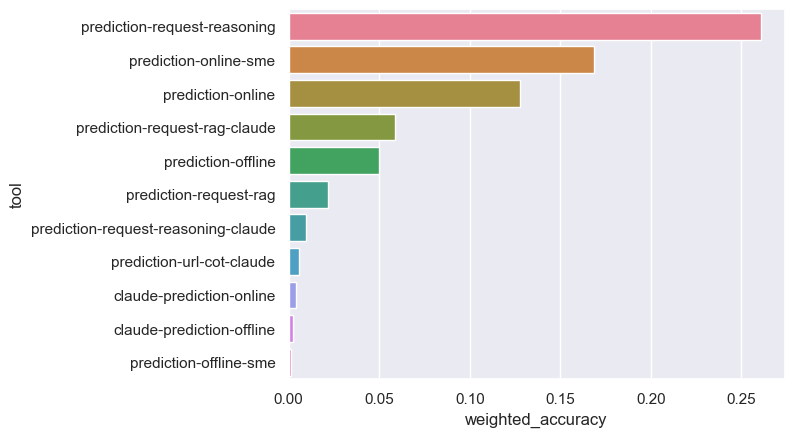

In [7]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="weighted_accuracy", y="tool", hue="tool")

<Axes: xlabel='weighted_accuracy', ylabel='tool'>

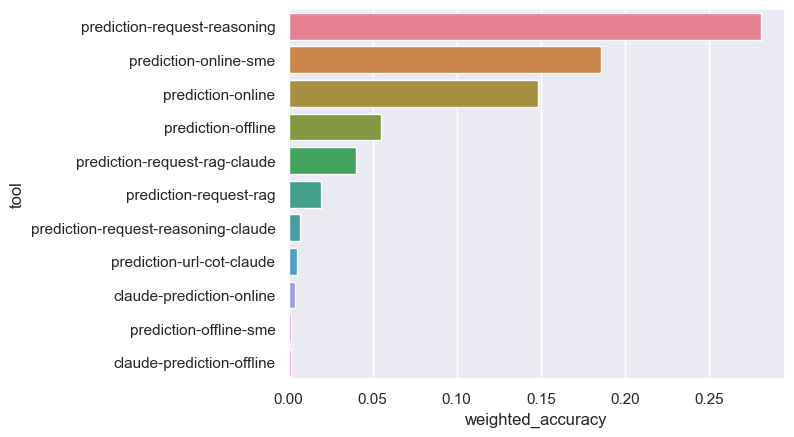

In [16]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="weighted_accuracy", y="tool", hue="tool")

In [17]:
tools_accuracy_info = tools_accuracy_info.sort_values(by='tool_accuracy', ascending=False)

<Axes: xlabel='tool_accuracy', ylabel='tool'>

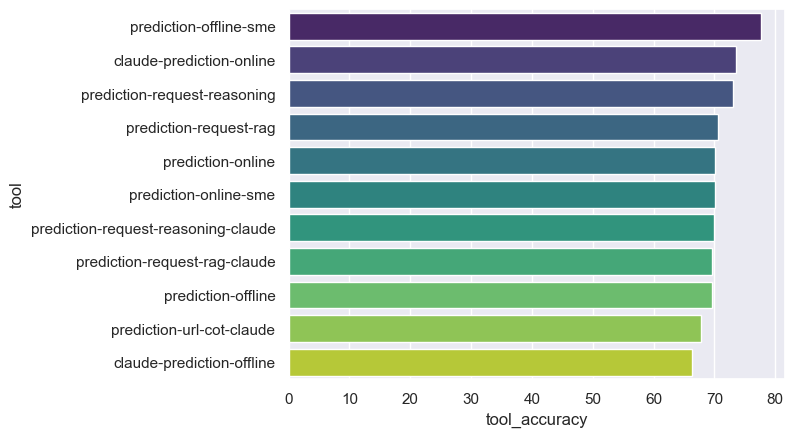

In [6]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="tool_accuracy", y="tool", hue="tool", palette="viridis")

<Axes: xlabel='tool_accuracy', ylabel='tool'>

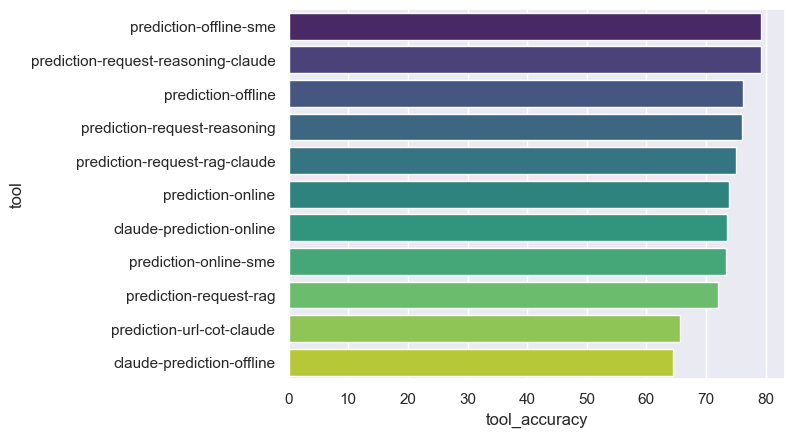

In [18]:
sns.set_theme(palette="viridis")
sns.barplot(tools_accuracy_info, x="tool_accuracy", y="tool", hue="tool", palette="viridis")